In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Amazon Customer Behavior Survey 2.csv")
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


Cleaning data

In [4]:
df.columns

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas'],
      dtype='object')

In [5]:
demographic_df = df[
    [
        "age",
        "Gender",
        "Purchase_Categories",
        "Cart_Completion_Frequency",
        "Cart_Abandonment_Factors",
    ]
]

demographic_df.head()

,age,Gender,Purchase_Categories,Cart_Completion_Frequency,Cart_Abandonment_Factors
0,23,Female,Beauty and Personal Care,Sometimes,Found a better price elsewhere
1,23,Female,Clothing and Fashion,Often,High shipping costs
2,24,Prefer not to say,Groceries and Gourmet Food;Clothing and Fashion,Sometimes,Found a better price elsewhere
3,24,Female,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Found a better price elsewhere
4,22,Female,Beauty and Personal Care;Clothing and Fashion,Sometimes,High shipping costs


# Are there specific product categories within specific customer segments (e.g., age groups, geographic regions) with higher cart abandonment rates? 

I wanna first see if things are really skewed in our data in gender, age and purchase categories

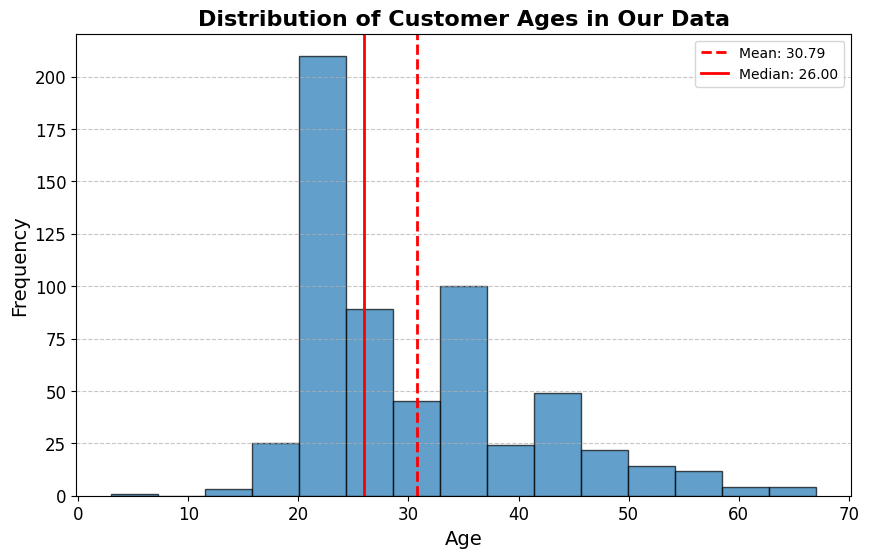

In [10]:
# Calculate the mean
mean_age = np.mean(demographic_df["age"])
median_age = np.median(demographic_df["age"])

plt.figure(figsize=(10, 6))

# Plot histogram
plt.hist(demographic_df["age"], bins=15, edgecolor="black", alpha=0.7)

# Add a vertical line at the mean
plt.axvline(
    mean_age, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_age:.2f}"
)

# add line for median
plt.axvline(
    median_age,
    color="red",
    linestyle="-",
    linewidth=2,
    label=f"Median: {median_age:.2f}",
)

# Title and labels
plt.title("Distribution of Customer Ages in Our Data", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add legend to explain the red line
plt.legend()

# Display the plot
plt.show()

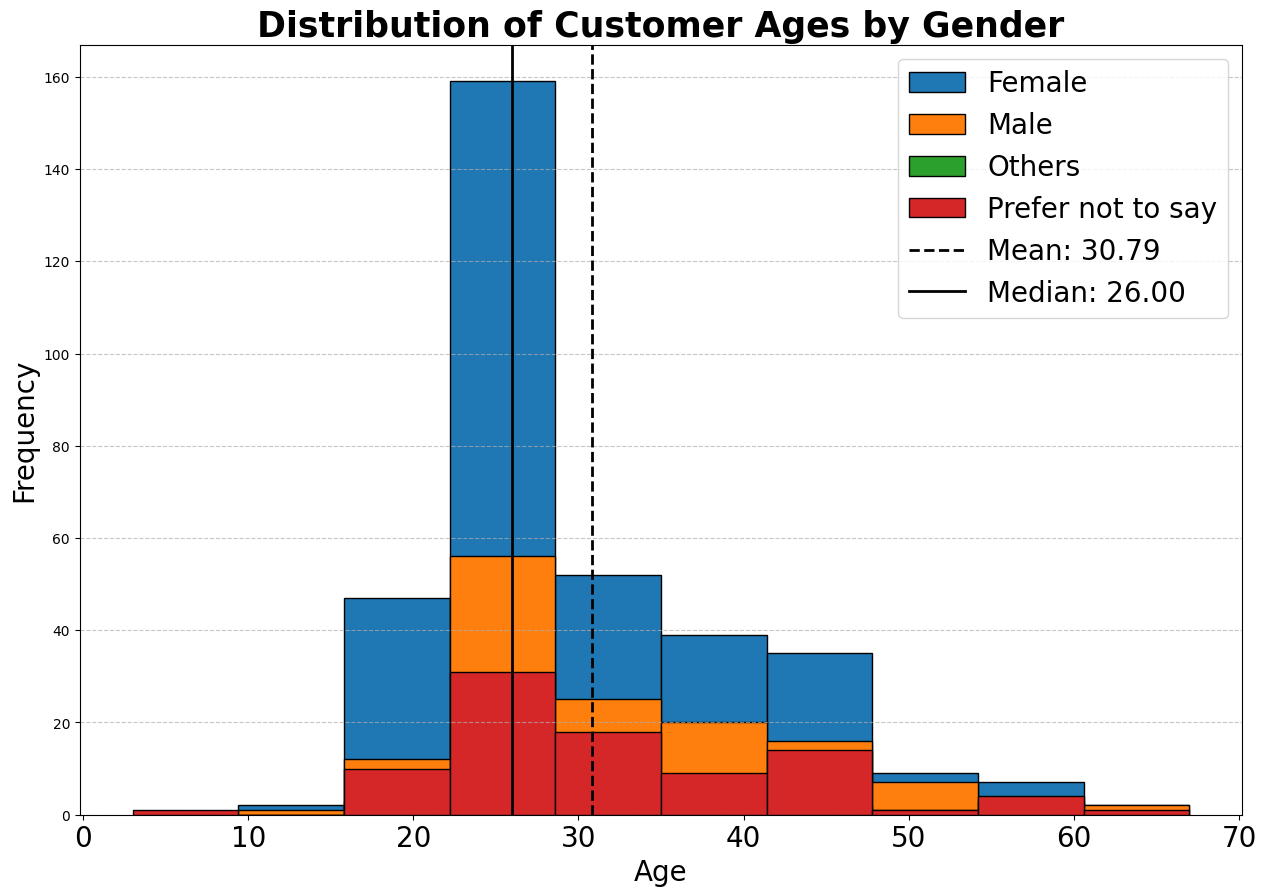

Gender
Female               352
Male                 142
Prefer not to say     89
Others                19
Name: count, dtype: int64


In [12]:
mean_age = np.mean(demographic_df["age"])
median_age = np.median(demographic_df["age"])

demographic_df.pivot(columns="Gender", values="age").plot.hist(
    edgecolor="black", figsize=(15, 10)
)
plt.title("Distribution of Customer Ages by Gender", fontsize=25, fontweight="bold")
plt.xlabel("Age", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
# Show grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.axvline(
    mean_age, color="black", linestyle="--", linewidth=2, label=f"Mean: {mean_age:.2f}"
)
plt.xticks(fontsize=20)
# add line for median
plt.axvline(
    median_age,
    color="black",
    linestyle="-",
    linewidth=2,
    label=f"Median: {median_age:.2f}",
)
plt.legend(fontsize=20)
plt.show()
print(demographic_df["Gender"].value_counts())

In [14]:
demographic_df["Cart_Completion_Frequency"].value_counts()

Cart_Completion_Frequency
Sometimes    304
Often        158
Rarely        72
Always        47
Never         21
Name: count, dtype: int64

/var/folders/bs/tlrmg2n164520pry59rs7fvh0000gn/T/ipykernel_25503/1870398175.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demo_df_exploded.groupby(["Cart_Completion_Frequency", "Purchase_Categories"])


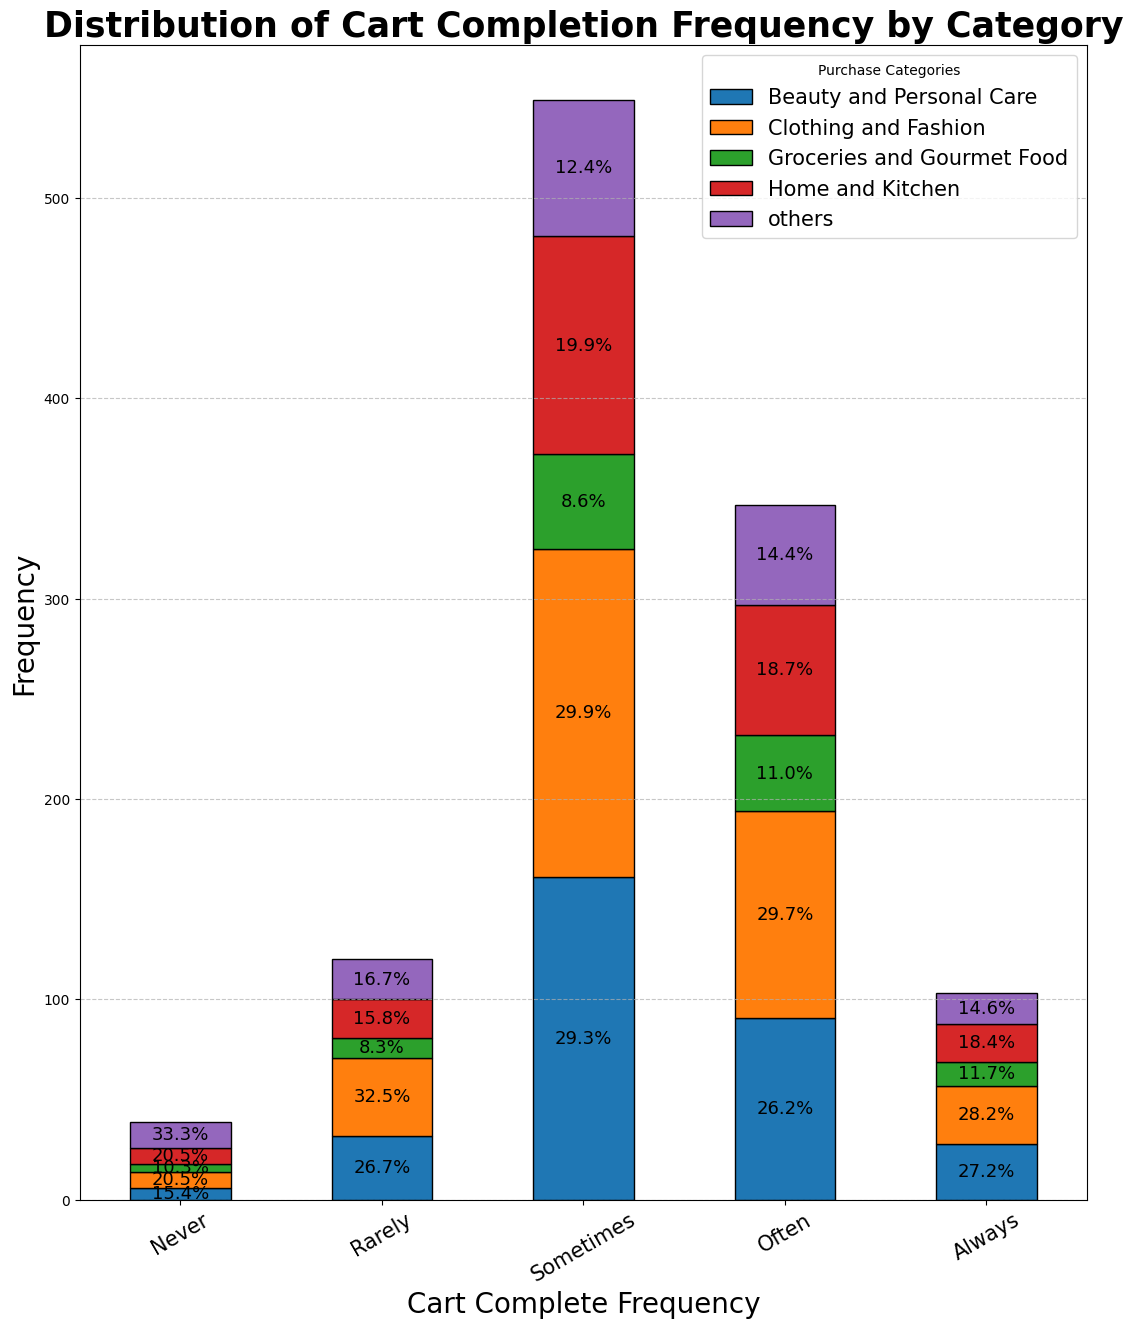

In [17]:
# Define the order you want for 'Purchase_Frequency'
frequency_order = [
    "Never",
    "Rarely",
    "Sometimes",
    "Often",
    "Always",
]

# Step 1: Explode Purchase_Categories by splitting on ";"
demo_df_exploded = demographic_df.assign(
    Purchase_Categories=demographic_df["Purchase_Categories"].str.split(";")
).explode("Purchase_Categories")

# Step 2: Convert 'Purchase_Frequency' to a categorical type with the specified order
demo_df_exploded["Cart_Completion_Frequency"] = pd.Categorical(
    demo_df_exploded["Cart_Completion_Frequency"],
    categories=frequency_order,
    ordered=True,
)

# Step 3: Group by Purchase_Frequency and Purchase_Categories, then count each combination
category_counts = (
    demo_df_exploded.groupby(["Cart_Completion_Frequency", "Purchase_Categories"])
    .size()
    .unstack()
    .fillna(0)
)

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(13, 15))
category_counts.plot(kind="bar", stacked=True, ax=plt.gca(), edgecolor="black")

# Customizing the plot
plt.title(
    "Distribution of Cart Completion Frequency by Category",
    fontsize=25,
    fontweight="bold",
)
plt.xlabel("Cart Complete Frequency", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=30, fontsize=15)

# Add percentage labels on top of each bar segment
for i, (index, row) in enumerate(category_counts.iterrows()):
    total = row.sum()
    cumulative = 0
    for j, (category, count) in enumerate(row.items()):
        if count > 0:
            percent = (count / total) * 100
            plt.text(
                i,
                cumulative + count / 2,
                f"{percent:.1f}%",
                ha="center",
                va="center",
                fontsize=13,
            )
            cumulative += count

# Show legend with category labels
plt.legend(title="Purchase Categories", fontsize=15)
plt.show()